Created by: Emmanuel Castillo [edc240000@utdallas.edu]

Running in Google Collab... Let's download the dataset necessary to run this notebook

In [11]:
! git clone https://github.com/ecastillot/AI_examples.git ./AI_examples

Cloning into './AI_examples'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 61 (delta 20), reused 32 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 21.15 MiB | 20.37 MiB/s, done.
Resolving deltas: 100% (20/20), done.



# Content:

1. **Application #1**: Vp and Vs relationship. (Linear regression)
<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap1.png" alt="drawing" width="500"/>

2. **Application #2**: Cat vs Non-Cat 🐱 (Logistic regression)
<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap2.png" alt="drawing" width="500"/>

3. **Application #3**: Earthquake detection 😎 (Logistic regression)
<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap3.png" alt="drawing" width="500"/>

... And an idea of the power of Convolutional Neural Networks



---





# Dataset

In [12]:
! ls -la ./AI_examples/dataset

total 18316
drwxr-xr-x 2 root root     4096 Nov  9 23:22 .
drwxr-xr-x 6 root root     4096 Nov  9 23:22 ..
-rw-r--r-- 1 root root 14130595 Nov  9 23:22 AE_data.tar.gz
-rw-r--r-- 1 root root  1424815 Nov  9 23:22 Results_A2_EC.xlsx
-rw-r--r-- 1 root root   616958 Nov  9 23:22 test_catvnoncat.h5
-rw-r--r-- 1 root root  2572022 Nov  9 23:22 train_catvnoncat.h5


# **Application #1: Vp and Vs relationship. (Linear regression)**

---



<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap1.png" alt="drawing" width="500"/>


Modules

In [13]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Let's use the data that we previously saw in assignments #2 and #3

In [14]:
df = pd.read_excel('/content/AI_examples/dataset/Results_A2_EC.xlsx')
df

,Depth (m),Vp (m/s),Vs (m/s),Density (kg/m3),E (GPa),v,K (GPa),u (GPa),Vp/Vs
0,1523.925632,5976.538307,3316.184720,2500,70.248501,0.277584,52.640588,27.492703,1.802233
1,1524.078025,5981.768459,3320.278899,2500,70.409336,0.277354,52.706378,27.560630,1.801586
2,1524.230418,5987.991167,3326.034507,2500,70.628978,0.276907,52.765077,27.656264,1.800339
3,1524.382810,5994.774442,3331.573282,2500,70.845347,0.276564,52.845366,27.748451,1.799382
4,1524.535203,6001.134015,3335.841230,2500,71.019062,0.276422,52.941235,27.819592,1.798987
...,...,...,...,...,...,...,...,...,...
13016,3507.467236,4640.210443,2582.000755,2500,42.525554,0.275755,31.606456,16.666820,1.797138
13017,3507.619628,4665.017346,2607.755709,2500,43.275797,0.272745,31.738001,17.000975,1.788901
13018,3507.772021,4714.215926,2664.490247,2500,44.914862,0.265295,31.894552,17.748771,1.769275
13019,3507.924413,4790.340478,2740.836034,2500,47.201064,0.256654,32.327798,18.780455,1.747766


Training dataset
- It's better to manage small numbers , so let's convert them into km

In [15]:
df["Vp (km/s)"] = df["Vp (m/s)"]/1e3
df["Vs (km/s)"] = df["Vs (m/s)"]/1e3

training_df = df[["Vp (km/s)","Vs (km/s)"]]
training_df

,Vp (km/s),Vs (km/s)
0,5.976538,3.316185
1,5.981768,3.320279
2,5.987991,3.326035
3,5.994774,3.331573
4,6.001134,3.335841
...,...,...
13016,4.640210,2.582001
13017,4.665017,2.607756
13018,4.714216,2.664490
13019,4.790340,2.740836


- vp -> x
- vs -> y

Bothe are 1d vector

In [16]:
x = df["Vp (km/s)"].to_numpy().reshape(-1, 1)
y = df["Vs (km/s)"].to_numpy().reshape(-1, 1)

print("Shape of x",x.shape)
print("Shape of y",y.shape)

Shape of x (13021, 1)
Shape of y (13021, 1)


let's plot the relationship

Text(0, 0.5, 'S-wave Velocity (km/s)')

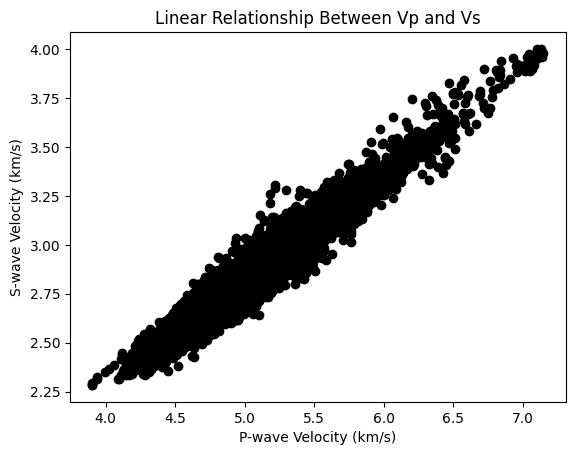

In [17]:
plt.plot(x,y,'ko')

# Remember to add labels!
plt.title('Linear Relationship Between Vp and Vs')
plt.xlabel('P-wave Velocity (km/s)')
plt.ylabel('S-wave Velocity (km/s)')

**Linear Regression using a Neural Network with 1 neuron**

<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap1_0.png" alt="drawing" width="600"/>

In [18]:
def vel_model(x_train,y_train,epochs):
    """
    Model to predit vs based on vp

    Parameters
    ----------
    x_train: array of numpy (vp)
    y_train: array of numpy (vs)
    epochs: number of epochs

    Returns
    -------
    tf.keras.Model
        Trained TensorFlow Keras model for Vs prediction.
    """

    model = tf.keras.Sequential() # groups a linear stack of layers layer 1, layer2, ...
    model.add( tf.keras.layers.Dense(units=1,activation='linear',input_shape=x_train[0].shape) ) # add a 1st layer, 1 unit (or 1 neuron in other words)
    model.compile(optimizer='sgd',loss='mean_squared_error') # Gradient descent and loss funtion
    model.fit(x_train,y_train,epochs=epochs) # fit the model with our x,y data
    return model

mymodel = vel_model(x_train=x,y_train=y,epochs=20)
mymodel.summary()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6641
Epoch 2/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034
Epoch 3/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033
Epoch 4/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032
Epoch 5/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031
Epoch 6/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031
Epoch 7/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030
Epoch 8/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030
Epoch 9/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0030
Epoch 10/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031
Epoch 11/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031
Epoch 12/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0029
Epoch 13/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029
Epoch 14/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029
Epoch 15/20
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0030


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Testing only in a single sample, vp = 5.9

In [19]:
x_test = np.array([5.9]).reshape(-1,1)
mymodel.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[3.2772582]], dtype=float32)

Testing in the array of interest

In [21]:
x_new = np.arange(5.9,6.8,0.05).reshape(-1,1)
x_new


array([[5.9 ],
       [5.95],
       [6.  ],
       [6.05],
       [6.1 ],
       [6.15],
       [6.2 ],
       [6.25],
       [6.3 ],
       [6.35],
       [6.4 ],
       [6.45],
       [6.5 ],
       [6.55],
       [6.6 ],
       [6.65],
       [6.7 ],
       [6.75]])

predictions

In [22]:
y_pred = mymodel.predict(x_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[3.2772582],
       [3.3038254],
       [3.3303926],
       [3.35696  ],
       [3.3835273],
       [3.4100947],
       [3.436662 ],
       [3.4632292],
       [3.4897966],
       [3.5163639],
       [3.5429313],
       [3.5694985],
       [3.5960658],
       [3.6226332],
       [3.6492004],
       [3.675768 ],
       [3.702335 ],
       [3.7289023]], dtype=float32)

let's plot our results

Text(0, 0.5, 'S-wave Velocity (km/s)')

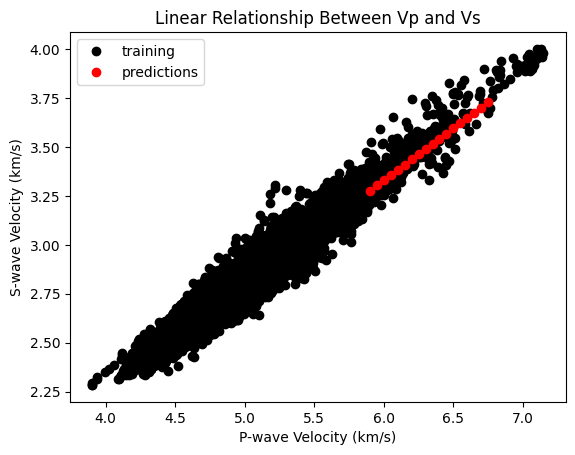

In [23]:
plt.plot(x,y,'ko',label="training")
plt.plot(x_new,y_pred,'ro',label="predictions")


# Remember to add labels!
plt.title('Linear Relationship Between Vp and Vs')
plt.legend()
plt.xlabel('P-wave Velocity (km/s)')
plt.ylabel('S-wave Velocity (km/s)')

now let's imagine we want to predict vs fot a random distribution of vp values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Text(0, 0.5, 'S-wave Velocity (km/s)')

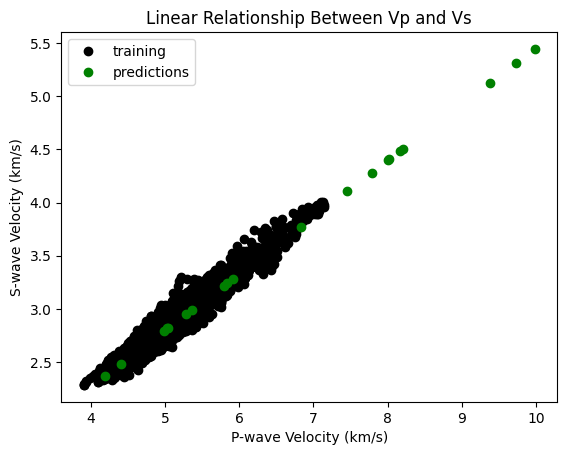

In [24]:
x_new2 = np.random.uniform(3,10,20).reshape(-1,1)
y_pred2 = mymodel.predict(x_new2)

plt.plot(x,y,'ko',label="training")
plt.plot(x_new2,y_pred2,'go',label="predictions")


# Remember to add labels!
plt.title('Linear Relationship Between Vp and Vs')
plt.legend()
plt.xlabel('P-wave Velocity (km/s)')
plt.ylabel('S-wave Velocity (km/s)')

# **Application #2: Cat vs Non-Cat 🐱 (Logistic regression)**

Reference:  Adapted version of Neural Networks and Deep Learning course from deeplearning.ai -- Coursera course

---


<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap2.png" alt="drawing" width="500"/>

modules

In [25]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Loading our dataset. **Don't worry about this**, it's not necessary to understand this. **Just to let you know that we are loading the data here**

In [26]:
def load_data(dataset_folder):
    train_dataset = h5py.File(f'{dataset_folder}/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(f'{dataset_folder}/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

dataset_folder = "./AI_examples/dataset"
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(dataset_folder)

let's take a look of the data

In [27]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (209,)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (50,)


it is always better to plot the data for better understanding

y = 1. It's a cat picture.


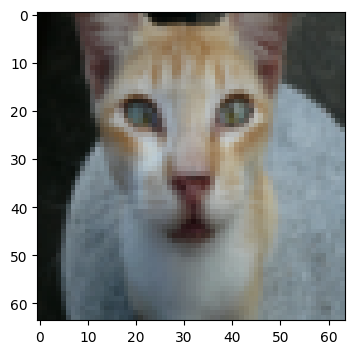

In [28]:
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[index]) + ". It's a " + classes[train_y[index]].decode("utf-8") +  " picture.")

Transform the image, this is the first step.

<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap2_1.png" alt="drawing" width="400"/>



 **Don't worry about this**, it's not necessary to understand this. **Just to let you know that we are transforming and normalizing the data here**

In [29]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (209, 12288)
test_x's shape: (50, 12288)


**Our data is ready. Now let's create our Neural Network for logistic regression using 1 neuron**

<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap2_2.png" alt="drawing" width="600"/>

In [33]:
def cat_or_noncat_model(x_train,y_train,epochs):
    """
    NN with 1 neuron (perceptron) for cat detection.

    Parameters
    ----------
    x_train: array of numpy (x data: image in 1d vector)
    y_train: array of numpy (y : labels -> cat 1 or noise 0)
    epochs: number of epochs

    Returns
    -------
    tf.keras.Model
        Trained TensorFlow Keras model for cat detection.
    """

    model = tf.keras.Sequential()
    model.add( tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid,input_shape=x_train[0].shape) ) # in this case, the activation uses the sigmoid function
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # adam is an adapted version of gradient descent, and binary_crossentrpoy is the loss function for logist tasks
    model.fit(x_train,y_train,epochs=epochs)
    return model

mymodel = cat_or_noncat_model(x_train=train_x,y_train=train_y,epochs=500)
mymodel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5205 - loss: 1.1365
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6031 - loss: 1.0288 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6536 - loss: 0.7380 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5859 - loss: 0.6695 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7655 - loss: 0.5586 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6743 - loss: 0.6045 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6970 - loss: 0.5529 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7139 - loss: 0.5288  
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7510 - loss: 0.5633 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7011 - loss: 0.5722 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 0.4854 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - los

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │          12,289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,869 (144.02 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,580 (96.02 KB)

As we already have labels in our test dataset, let's see how well it did

In [34]:
test_loss, test_acc = mymodel.evaluate(test_x, test_y)
print("Test accuracy: %.4f" % test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6825 - loss: 1.6895 
Test accuracy: 0.6800


let me see what the predictions are (for the first 10 figures in my test dataset)

In [36]:
predictions = mymodel.predict(test_x)
predictions[0:10]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[9.9637115e-01],
       [9.7861564e-01],
       [9.1495860e-01],
       [9.9597818e-01],
       [7.7191913e-01],
       [2.0235127e-01],
       [8.8508357e-05],
       [9.3082112e-01],
       [8.2405990e-01],
       [7.1605563e-01]], dtype=float32)

previous values are between 0 and 1. We need to round them. >0.5 will be 1.

In [37]:
rounded_predictions = np.round(predictions).astype(int)
rounded_predictions[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1]])

Again let me see with the figures

Prediction: y = [1]
Your single model predicts a "cat picture.


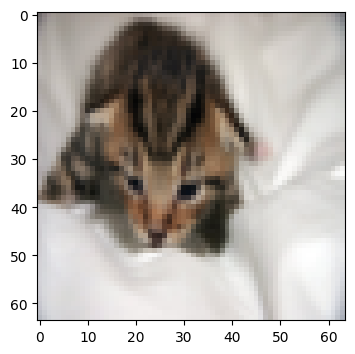

In [38]:
index = 1
plt.imshow(test_x_orig[index])
print ("Prediction: y = " + str(rounded_predictions[index]) )
print("Your single model predicts a \"" + classes[rounded_predictions[index][0]].decode("utf-8") +  " picture.")

let's evaluate our model. **Don't worry about this, it's only to show you the concept**

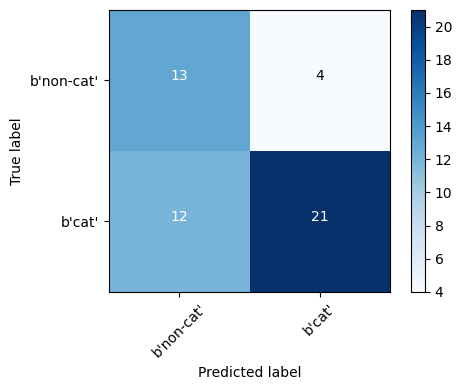

In [39]:
cm = confusion_matrix(y_true= test_y, y_pred = np.squeeze(rounded_predictions))
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marcks = np.arange((len(classes)))
plt.xticks(tick_marcks,classes,rotation=45)
plt.yticks(tick_marcks,classes)

thresh = cm.max()/2
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,cm[i,j],horizontalalignment="center",
           color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# **Application #3: Earthquake detection 😎 (Logistic regression)**


<img src="https://raw.githubusercontent.com/ecastillot/AI_examples/master/figures/ap3.png" alt="drawing" width="500"/>

modules

In [40]:
from sklearn.metrics import confusion_matrix
import gzip
import pickle
import itertools

Loading our dataset. **Don't worry about this**, it's not necessary to understand this. **Just to let you know that we are loading the data here**

In [41]:
def load_data():
    with gzip.GzipFile("/content/AI_examples/dataset/AE_data.tar.gz", "r") as f:
        data = pickle.load(f)
    return data["train_data"], data["train_labels"], data["test_data"], data["test_labels"]

train_signals, train_labels, test_signals, test_labels = load_data()
classes = {'1':"earthquake",'0':"noise"}

let's take a look of the data

In [42]:
m_train = train_signals.shape[0]
m_test = test_signals.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("train_signals shape: " + str(train_signals.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_signals shape: " + str(test_signals.shape))
print ("test_labels shape: " + str(test_labels.shape))

Number of training examples: 1440
Number of testing examples: 360
train_signals shape: (1440, 1024)
train_labels shape: (1440,)
test_signals shape: (360, 1024)
test_labels shape: (360,)


it is always better to plot the data for better understanding

y = 0 --> noise


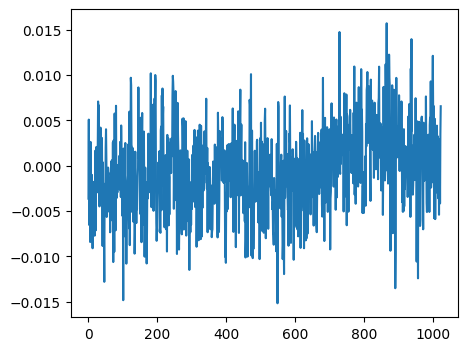

In [43]:
index = 0
plt.plot(train_signals[index,:])
print ("y = " + str(train_labels[index]) + " --> " + classes[str(train_labels[index] )])

another fancy figure to see more data

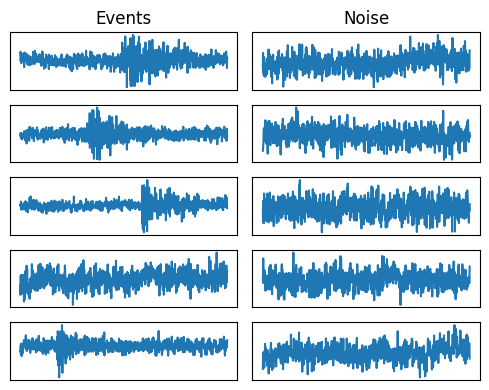

In [49]:
# Select training signals of events
events = (train_labels == 1)
event_signals = train_signals[events][:5].reshape((5, -1))

# Select training signals of noise (no events)
noise_signals = train_signals[~events][:5].reshape((5, -1))

# Plot 5 examples of events and noise
for i in range(5):
    # Events
    plt.subplot(5, 2, 1+2*i)
    if i == 0:
        plt.title("Events")
    plt.plot(event_signals[i])
    plt.xticks([])
    plt.yticks([])

    # Noise
    plt.subplot(5, 2, 2+2*i)
    if i == 0:
        plt.title("Noise")
    plt.plot(noise_signals[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

Our data is ready. Now let's create our Neural Network for logistic regression using 1 neuron

In [44]:
# note that we will use the same architecture than before (1 neuron)
def earthquake_detection_model(x_train,y_train,epochs):
    """
    NN with 1 neuron (perceptron) for earthquake detection.

    Parameters
    ----------
    x_train: array of numpy (x data: signal)
    y_train: array of numpy (y : labels -> earthquake 1 or noise 0)
    epochs: number of epochs

    Returns
    -------
    tf.keras.Model
        Trained TensorFlow Keras model for earthquake detection.
    """

    model = tf.keras.Sequential()
    model.add( tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid,input_shape=x_train[0].shape) )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train,y_train,epochs=epochs)
    return model

mymodel = earthquake_detection_model(x_train=train_signals,y_train=train_labels,epochs=100)
mymodel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5094 - loss: 0.6931
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5631 - loss: 0.6918
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5383 - loss: 0.6919
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5722 - loss: 0.6902
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5672 - loss: 0.6895
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5672 - loss: 0.6887
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5830 - loss: 0.6880
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5546 - loss: 0.6878
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5832 - loss: 0.6857
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6031 - loss: 0.6849
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5849 - loss: 0.6851
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

As we already have labels in our test dataset, let's see how well it did

In [45]:
test_loss, test_acc = mymodel.evaluate(test_signals, test_labels)
print("Test accuracy: %.4f" % test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5509 - loss: 0.6780  
Test accuracy: 0.5444


let me see what the predictions are. We need to round them. >0.5 will be 1.

(for the first 10 figures in my test dataset)

In [46]:
predictions = mymodel.predict(test_signals)
rounded_predictions = np.round(predictions).astype(int)
rounded_predictions[0:10]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

Again let me see with the figures

Reality: y = 1 --> earthquake
Prediction: y = 1 --> . Your single model prediction: earthquake


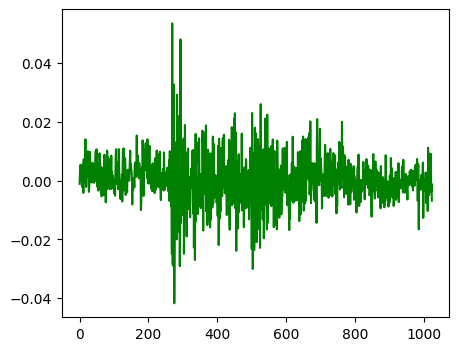

In [50]:
index = 15

if rounded_predictions[index][0] == test_labels[index]:
    color = "g"
else:
    color = "r"
plt.plot(test_signals[index,:],color=color)

print ("Reality: y = " + str(test_labels[index]) +\
    " --> " + classes[str(test_labels[index] )])
print ("Prediction: y = " + str(rounded_predictions[index][0]) +\
    " --> . Your single model prediction: " + classes[str(rounded_predictions[index][0] )])

let's evaluate our model. **Don't worry about this, it's only to show you the concept**

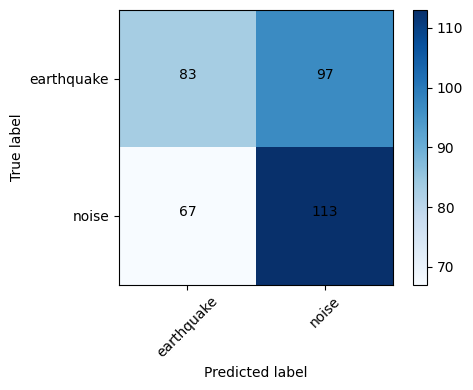

In [48]:
cm = confusion_matrix(y_true= test_labels, y_pred = np.squeeze(rounded_predictions))
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marcks = np.arange((len(list(classes.values()))))
plt.xticks(tick_marcks,list(classes.values()),rotation=45)
plt.yticks(tick_marcks,list(classes.values()))

thresh = cm.max()/2
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,cm[i,j],horizontalalignment="center",
           color="black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Another fancy way to plot the results. As the confidence is closet to 0 means that the model was not very sure in the result. That means, the prediction was very close to 0.5

<ipython-input-52-9f72e0b12b1d>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("%.3f" % confidence[n])


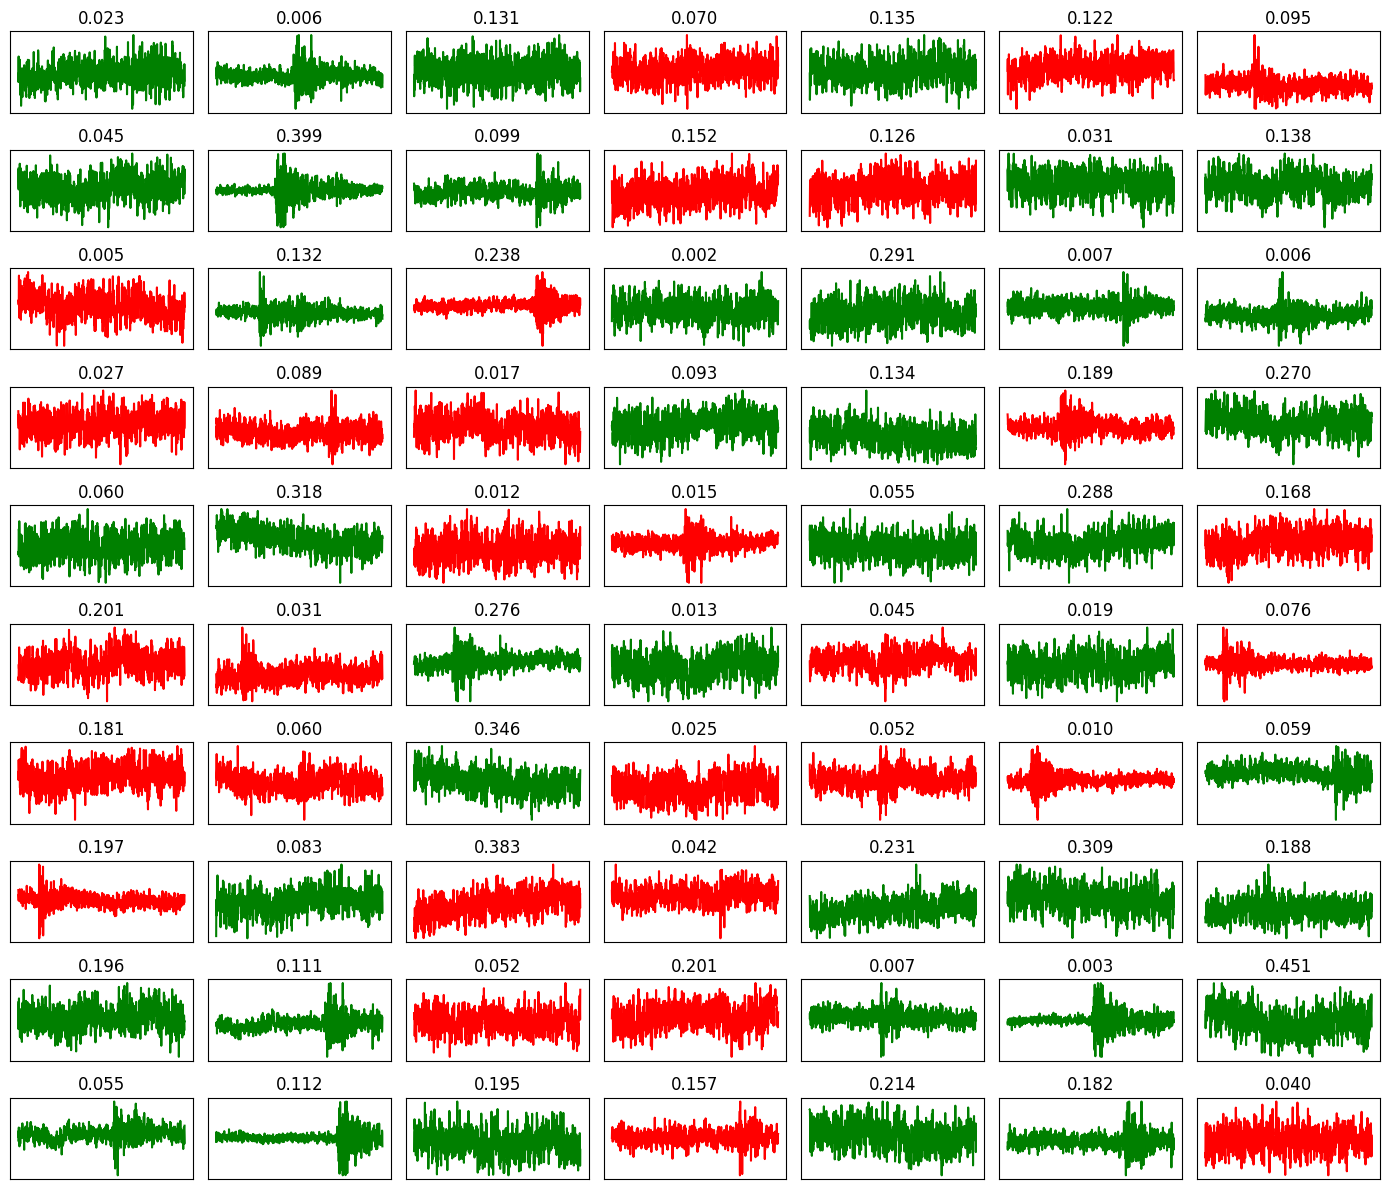

In [52]:
fig = plt.figure(figsize=(14, 12))

confidence = 2 * np.abs(predictions - 0.5)

# Plot 70 examples of events and noise
for i in range(10):
    for j in range(7):
        n = 7*i + j
        # Events
        plt.subplot(10, 7, 1+n)
        if rounded_predictions[n][0] == test_labels[n]:
            color = "g"
        else:
            color = "r"
        plt.plot(test_signals[n], c=color)
        plt.xticks([])
        plt.yticks([])
        plt.title("%.3f" % confidence[n])

plt.tight_layout()
plt.show()

# Convolutional Neural Networks

In [53]:
def CNN_detection_model(x_train,y_train,epochs):

    # Keras default initialiser = glorot_uniform
    # A better initialiser for ReLU activations = he_normal
    initializer = "he_normal"
    # initializer = "glorot_uniform"

    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer, input_shape=x_train[0].shape),
        tf.keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
        tf.keras.layers.MaxPooling1D(),
        tf.keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
        tf.keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
        tf.keras.layers.MaxPooling1D(),
        tf.keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
        tf.keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
        tf.keras.layers.MaxPooling1D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation=tf.nn.relu, kernel_initializer=initializer),
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, kernel_initializer="glorot_normal")
    ])
    # Compile and print a summary
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(
        x_train,
        y_train,
        verbose=1,
        epochs=10)
    return model


# For convolutional layers, an additional dimension needs to be added
rs_train_signals = np.expand_dims(train_signals, 2)
rs_test_signals = np.expand_dims(test_signals, 2)
CNNmodel = CNN_detection_model(x_train=rs_train_signals,y_train=train_labels,epochs=100)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5194 - loss: 0.6933
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6823 - loss: 0.6713
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7522 - loss: 0.5979
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.7152 - loss: 0.6052
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.7553 - loss: 0.5446
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.7882 - loss: 0.5093
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.8057 - loss: 0.4613
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.8070 - loss: 0.4519
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8151 - loss: 0.4364
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8242 - loss: 0.4129


As we already have labels in our test dataset, let's see how well it did

In [54]:
test_loss, test_acc = CNNmodel.evaluate(rs_test_signals, test_labels)
print("Test accuracy: %.4f" % test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8460 - loss: 0.4192
Test accuracy: 0.8528


previous values are between 0 and 1. We need to round them. >0.5 will be 1.

In [55]:
CNNpredictions = CNNmodel.predict(rs_test_signals)
CNNrounded_predictions = np.round(CNNpredictions).astype(int)
CNNrounded_predictions [0:10]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

Reality: y = 1 --> earthquake
Prediction: y = 1 --> . Your single model prediction: earthquake


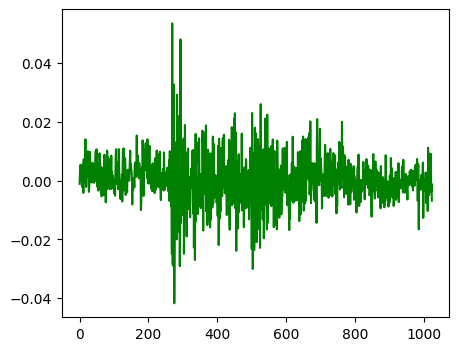

In [58]:
index = 15

if CNNrounded_predictions[index][0] == test_labels[index]:
    color = "g"
else:
    color = "r"
plt.plot(test_signals[index,:],color=color)

print ("Reality: y = " + str(test_labels[index]) +\
    " --> " + classes[str(test_labels[index] )])
print ("Prediction: y = " + str(CNNrounded_predictions[index][0]) +\
    " --> . Your single model prediction: " + classes[str(CNNrounded_predictions[index][0] )])

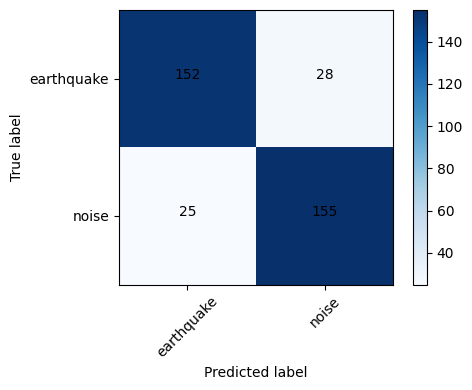

In [59]:
cm = confusion_matrix(y_true= test_labels, y_pred = np.squeeze(CNNrounded_predictions))
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marcks = np.arange((len(list(classes.values()))))
plt.xticks(tick_marcks,list(classes.values()),rotation=45)
plt.yticks(tick_marcks,list(classes.values()))

thresh = cm.max()/2
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,cm[i,j],horizontalalignment="center",
           color="black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<ipython-input-60-fda8437840c3>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("%.3f" % confidence[n])


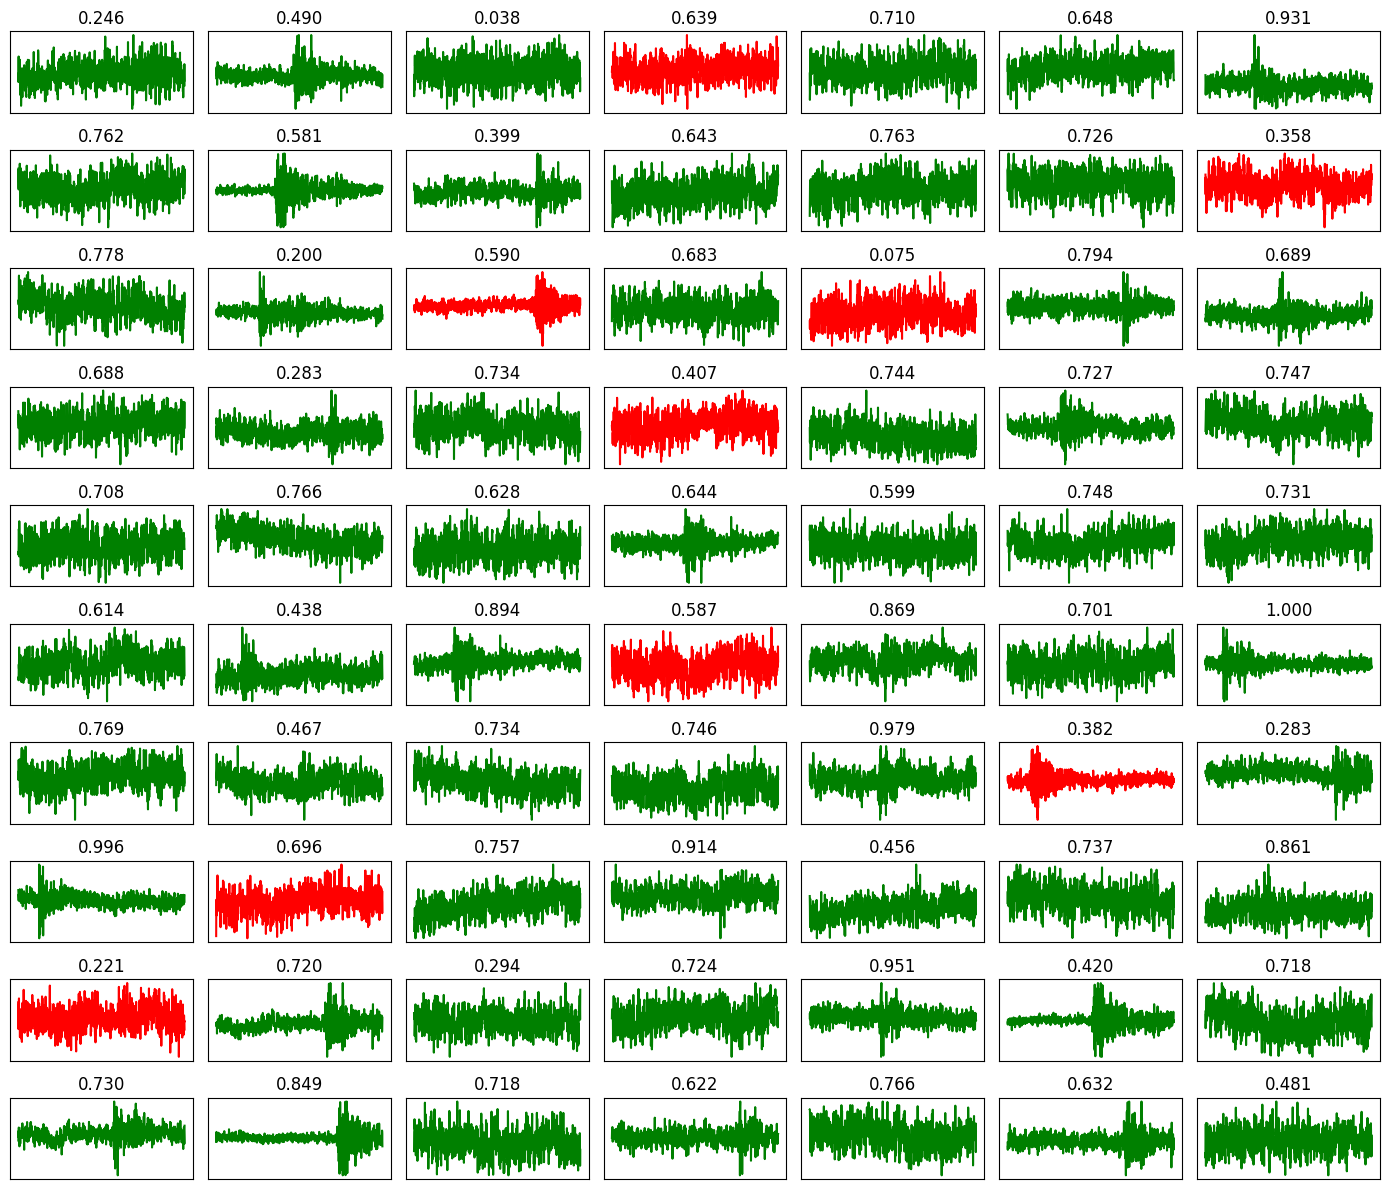

In [60]:
CNNpredictions = CNNmodel.predict(rs_test_signals)
confidence = 2 * np.abs(CNNpredictions - 0.5)
CNNpredictions = np.round(CNNpredictions).astype(int)


fig = plt.figure(figsize=(14, 12))

# Plot 70 examples of events and noise
for i in range(10):
    for j in range(7):
        n = 7*i + j
        # Events
        plt.subplot(10, 7, 1+n)
        if CNNpredictions[n] == test_labels[n]:
            color = "g"
        else:
            color = "r"
        plt.plot(test_signals[n], c=color)
        plt.xticks([])
        plt.yticks([])
        plt.title("%.3f" % confidence[n])

plt.tight_layout()
plt.show()

Awesome! I hope you have enjoyed this notebook 🙂 🥇